In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Define the path to the JSON file
file_path = '/content/drive/MyDrive/Books_5.json'


In [3]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the file path in your Google Drive
file_path = '/content/drive/MyDrive/Books_5.json'

# Define the number of observations to parse in each chunk
chunk_size = 10000

# Initialize an empty list to store sampled data
sampled_data = []

# Open the JSON file and read it in chunks
with open(file_path, 'r') as input_file:
    for chunk in pd.read_json(input_file, lines=True, chunksize=chunk_size):
        # Perform stratified sampling on the chunk
        sampled_chunk, _ = train_test_split(chunk, test_size=0.8, stratify=chunk['overall'])
        sampled_data.append(sampled_chunk)

# Concatenate the sampled chunks into a single DataFrame
sampled_df = pd.concat(sampled_data)

# Print the sampled DataFrame
print(sampled_df.head())


          reviewerID        asin           reviewerName     helpful  \
6919  A1OB5L3WMHJAD9  0004707532     Christopher Culver      [0, 0]   
4664  A2V4AU8T476XCR  0002247399                 Booker      [0, 0]   
1166  A1WGOBPQK9NZKY  0002007770        EAM "EAM Books"      [1, 1]   
1676   ALLJT7S5QOFFZ  0002007770                 kaduzy  [216, 258]   
5397   ANAKK5KNUAP17  0002247399  Julio Caicedo "Julio"      [0, 0]   

                                             reviewText  overall  \
6919  The year was 1995. Irish music was wildly popu...        3   
4664  Personally, I'm okay with soaking up GRRM's wo...        5   
1166  I LOVED this book and found it nearly impossib...        5   
1676  I found this book interesting because of the r...        3   
5397  Ok..I wrote a previous review on ADWD the seco...        3   

                                                summary  unixReviewTime  \
6919  Useful if you just need to understand words in...      1210118400   
4664          

In [4]:
num_observations = sampled_df.shape[0]
print("Number of observations in sampled_df:", num_observations)


Number of observations in sampled_df: 1779608


In [5]:
overall_distribution = sampled_df['overall'].value_counts()
print(overall_distribution)


overall
5    996163
4    444606
3    191041
2     83029
1     64769
Name: count, dtype: int64


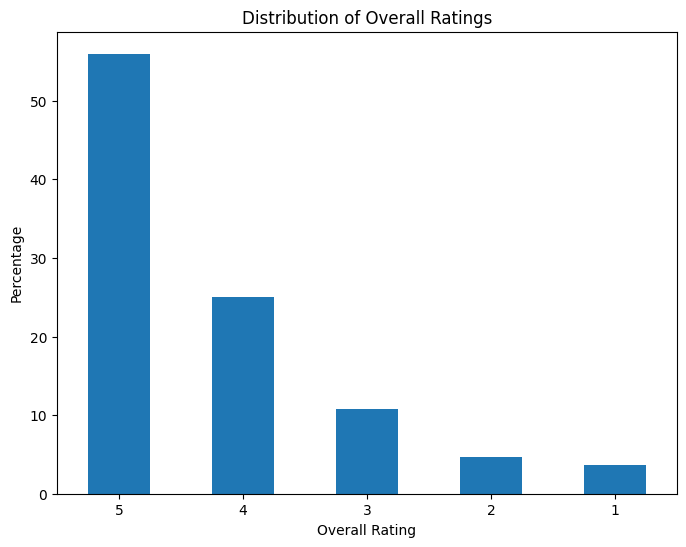

In [6]:
import matplotlib.pyplot as plt

# Calculate the percentage of each category
overall_percentage = (sampled_df['overall'].value_counts() / len(sampled_df)) * 100

# Plot the bar graph
plt.figure(figsize=(8, 6))
overall_percentage.plot(kind='bar')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


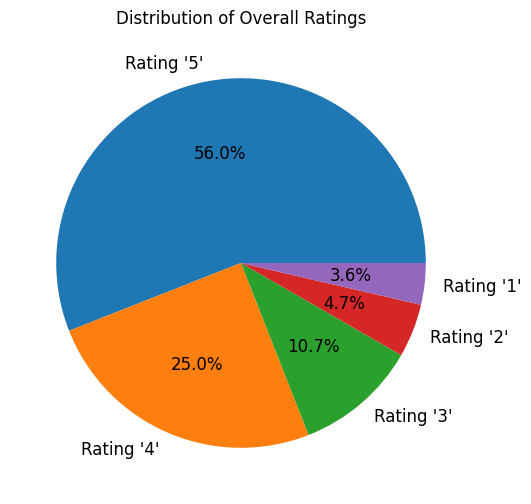

In [7]:
import matplotlib.pyplot as plt

# Calculate the percentage of each category
overall_percentage = (sampled_df['overall'].value_counts() / len(sampled_df)) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(overall_percentage, labels=["Rating '{}'".format(i) for i in overall_percentage.index], autopct='%1.1f%%')

# Add labels
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title('Distribution of Overall Ratings')

# Save the plot as an image file
plt.savefig('overall_ratings_pie_chart.png')

plt.show()


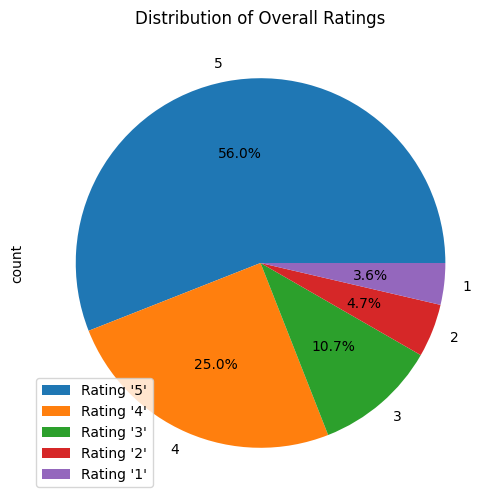

In [8]:
import matplotlib.pyplot as plt

# Calculate the percentage of each category
overall_percentage = (sampled_df['overall'].value_counts() / len(sampled_df)) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
overall_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Overall Ratings')

# Add labels
labels = ["Rating '{}'".format(i) for i in overall_percentage.index]
plt.legend(labels=labels, loc='best')

plt.show()


In [9]:
# Define the number of observations to sample
num_samples = 5000

# Stratified sampling function
def stratified_sample(data):
    num_to_sample = min(len(data), max(1, int(num_samples / len(sampled_df) * len(data))))
    return data.sample(num_to_sample)

# Apply stratified sampling to each group of the 'overall' column
stratified_sampled_df = sampled_df.groupby('overall', group_keys=False).apply(stratified_sample)

# Reset index
stratified_sampled_df = stratified_sampled_df.reset_index(drop=True)

# Print the first few rows to verify
print(stratified_sampled_df.head())


       reviewerID        asin               reviewerName   helpful  \
0  A17FLA8HQOFVIG  000721278X             Linda Linguvic  [16, 19]   
1  A3HCGZUJD9OW0S   345803485  Herb & Anna "Herb & Anna"    [1, 1]   
2   AWM3G5E4X0JUL  0895260522             Francesco Tore  [17, 75]   
3  A31R7SO1NATXVZ  0446605158            Diogenes "tlhm"    [4, 8]   
4  A37OT4OR6ANJVW  0843947888              J. Surowiecki   [8, 10]   

                                          reviewText  overall  \
0  I've recently developed an interest in the Tud...        1   
1  This book is ridiculous.The man is perfect. Bo...        1   
2  I already knew on which side of the political ...        1   
3  What a major disappointment.  How this can be ...        1   
4  The only thing missing from Richard Laymon's &...        1   

                                             summary  unixReviewTime  \
0  Boring narrative and questionable history. Not...      1210464000   
1                                        Oh 

In [10]:
num_observations = stratified_sampled_df.shape[0]
print("Number of observations in stratified_sampled_df:", num_observations)


Number of observations in stratified_sampled_df: 4997


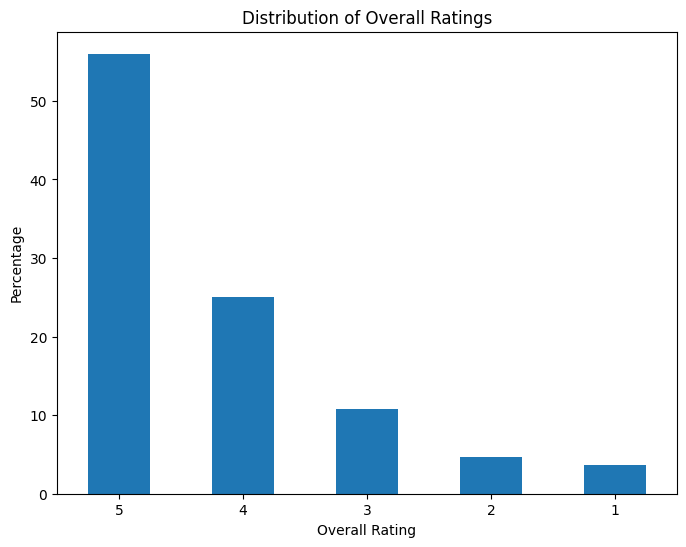

In [11]:
import matplotlib.pyplot as plt

# Calculate the percentage of each category
overall_percentage = (stratified_sampled_df['overall'].value_counts() / len(stratified_sampled_df)) * 100

# Plot the bar graph
plt.figure(figsize=(8, 6))
overall_percentage.plot(kind='bar')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


In [12]:
import pandas as pd

# Assuming stratified_sampled_df is your DataFrame
# Filter to keep only 'reviewText' and 'overall' columns
stratified_sampled_df = stratified_sampled_df.loc[:, ['reviewText', 'overall']]


In [13]:
stratified_sampled_df

,reviewText,overall
0,I've recently developed an interest in the Tud...,1
1,This book is ridiculous.The man is perfect. Bo...,1
2,I already knew on which side of the political ...,1
3,What a major disappointment. How this can be ...,1
4,The only thing missing from Richard Laymon's &...,1
...,...,...
4992,This book hooked me in the first pages and the...,5
4993,Pie is good and pie is great but Pi is also in...,5
4994,Very well written.Hell has to burn a little ho...,5
4995,If Marta Tuchowska had lived thousands of year...,5


In [14]:
stratified_sampled_df['overall'] = stratified_sampled_df['overall'] - 1

In [15]:
df = stratified_sampled_df

In [16]:
df

,reviewText,overall
0,I've recently developed an interest in the Tud...,0
1,This book is ridiculous.The man is perfect. Bo...,0
2,I already knew on which side of the political ...,0
3,What a major disappointment. How this can be ...,0
4,The only thing missing from Richard Laymon's &...,0
...,...,...
4992,This book hooked me in the first pages and the...,4
4993,Pie is good and pie is great but Pi is also in...,4
4994,Very well written.Hell has to burn a little ho...,4
4995,If Marta Tuchowska had lived thousands of year...,4


In [17]:
df['overall'] = df['overall'].astype(int)
# Using the dtype attribute
overall_dtype = df['overall'].dtype
print("Data type of 'overall' column:", overall_dtype)

Data type of 'overall' column: int64


In [18]:
# Remove rows with missing values
df = df.dropna()

# Display the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", df.shape)


Shape of cleaned DataFrame: (4997, 2)


In [19]:
# Specify the path where you want to save the CSV file
file_path = "Preprocessed5000.csv"

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude row indices in the CSV

print(f"DataFrame saved to {file_path}")

DataFrame saved to Preprocessed5000.csv


In [20]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [21]:
from datasets import Dataset
dataset = Dataset.from_csv('/content/Preprocessed5000.csv')


Generating train split: 0 examples [00:00, ? examples/s]

In [22]:
dataset

Dataset({
    features: ['reviewText', 'overall'],
    num_rows: 4997
})

In [27]:
from sklearn.model_selection import train_test_split
from datasets import DatasetDict
from datasets import Dataset, DatasetDict



train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_dataset = Dataset.from_dict(train_data)

# Convert the splits to Dataset objects

val_dataset = Dataset.from_dict(val_data)


# Create a new DatasetDict object to hold the splits
split_dataset = DatasetDict({'train': train_dataset, 'validation': val_dataset})
split_dataset

DatasetDict({
    train: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 3997
    })
    validation: Dataset({
        features: ['reviewText', 'overall'],
        num_rows: 1000
    })
})

In [28]:
# Save train split to CSV
split_dataset['train'].to_csv('train_dataset.csv', index=False)


# Save validation split to CSV
split_dataset['validation'].to_csv('validation_dataset.csv', index=False)


Creating CSV from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

873338

In [29]:
# Step 2: Upload the file to your desired storage location

from google.colab import drive
drive.mount('/content/drive')

# Move the file to Google Drive
!mv train_dataset.csv /content/drive/MyDrive/
!mv validation_dataset.csv /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
